In [133]:
import pandas as pd
import numpy as np
data = pd.read_csv("/home/gaurav/work/test/train.csv", index_col="Loan_ID")
print data


          Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001003    Male     Yes          1      Graduate            No   
LP001005    Male     Yes          0      Graduate           Yes   
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
LP001011    Male     Yes          2      Graduate           Yes   
LP001013    Male     Yes          0  Not Graduate            No   
LP001014    Male     Yes         3+      Graduate            No   
LP001018    Male     Yes          2      Graduate            No   
LP001020    Male     Yes          1      Graduate            No   
LP001024    Male     Yes          2      Graduate            No   
LP001027    Male     Yes          2      Graduate           NaN   
LP001028    Male     Yes          2      Graduate            N

In [60]:
#1. Boolean Indexing
#all females who are not graduate and got a loan

data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"),["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


In [123]:
#2.calculate total Missing value Row and Column wise

def num_missing(x):
  return sum(x.isnull())


print "Missing values per column:"
print data.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column

#Applying per row:
print "\nMissing values per row:"
print data.apply(num_missing, axis=1).head() #axis=1 defines that function is to be applied on each row

Missing values per column:
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values per row:
Loan_ID
LP001002    0
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


In [87]:
#3 IMputing Missing Values
data['Gender'].fillna(mode(data['Gender']).mode[0], inplace=True)
data['Married'].fillna(mode(data['Married']).mode[0], inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed']).mode[0], inplace=True)
print data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [111]:
#4 LoanAmount of each group can be determined as:
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print impute_grps
x=data.loc[data['LoanAmount'].isnull()]


                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


In [125]:
#iterate only through rows with missing LoanAmount and insert above calculated mean value
for i,row in data.loc[data['LoanAmount'].isnull()].iterrows():
    ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
    data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]
    
print data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [127]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [134]:
def percConvert(ser):
    return ser/float(ser[-1])

pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True).apply(percConvert, axis=1)


Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


In [136]:
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


In [146]:
#The pivot table validates successful merge operation. Note that the ‘values’ argument is irrelevant here because we are simply counting the values.
data_merged = data.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)

Property_Area  rates
Rural          1000     179.0
Semiurban      5000     233.0
Urban          12000    202.0
Name: Credit_History, dtype: float64

In [141]:
data_sorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0.0
LP002101,63337,0.0
LP001585,51763,0.0
LP001536,39999,0.0
LP001640,39147,4750.0
LP002422,37719,0.0
LP001637,33846,0.0
LP001448,23803,0.0
LP002624,20833,6667.0


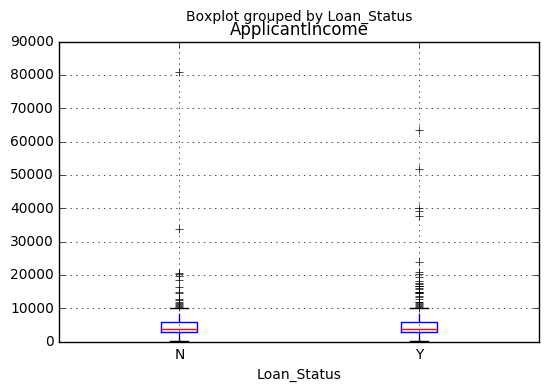

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="ApplicantIncome",by="Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f21c7e7f610>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f21c7cee910>], dtype=object)

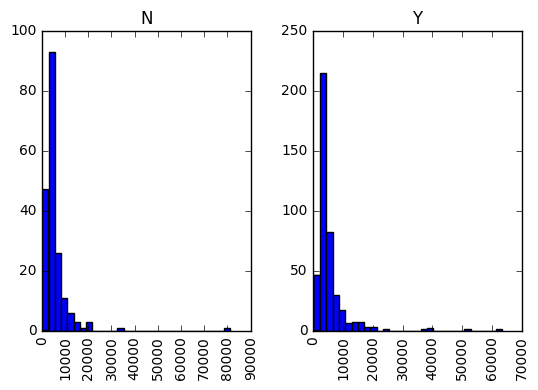

In [145]:
#This shows that income is not a big deciding factor on its own as there is no appreciable difference between the people who received and were denied the loan.
data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)